# ANALYSIS OF HEALTH DATA

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv("ntrarogyaseva.csv").iloc[:,1:]

## Inspect Document

In [3]:
data.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


In [4]:
c_names = data.columns
c_names

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [5]:
data.dtypes # too many object class, should be coded

AGE                  int64
SEX                 object
CASTE_NAME          object
CATEGORY_CODE       object
CATEGORY_NAME       object
SURGERY_CODE        object
SURGERY             object
VILLAGE             object
MANDAL_NAME         object
DISTRICT_NAME       object
PREAUTH_DATE        object
PREAUTH_AMT          int64
CLAIM_DATE          object
CLAIM_AMOUNT         int64
HOSP_NAME           object
HOSP_TYPE           object
HOSP_LOCATION       object
HOSP_DISTRICT       object
SURGERY_DATE        object
DISCHARGE_DATE      object
Mortality Y / N     object
MORTALITY_DATE      object
SRC_REGISTRATION    object
dtype: object

In [6]:
tbdropped = ["CATEGORY_CODE","SURGERY_CODE","VILLAGE","MANDAL_NAME","DISTRICT_NAME","HOSP_DISTRICT","Mortality Y / N","MORTALITY_DATE","SRC_REGISTRATION","DISCHARGE_DATE"]

In [7]:
'''
Ordinal encode:

SEX
CASTE_NAME
CATEGORY
SURGERY
HOSP_NAME
HOSP_TYPE
'''

'\nOrdinal encode:\n\nSEX\nCASTE_NAME\nCATEGORY\nSURGERY\nHOSP_NAME\nHOSP_TYPE\n'

In [8]:
'''
Make groups:

Surgery with category,
Hosp_name with hosp type
'''

'\nMake groups:\n\nSurgery with category,\nHosp_name with hosp type\n'

In [9]:
data.isna().sum()

AGE                      0
SEX                      0
CASTE_NAME               0
CATEGORY_CODE            0
CATEGORY_NAME            0
SURGERY_CODE             0
SURGERY                  0
VILLAGE                  0
MANDAL_NAME              0
DISTRICT_NAME            0
PREAUTH_DATE             0
PREAUTH_AMT              0
CLAIM_DATE               0
CLAIM_AMOUNT             0
HOSP_NAME                0
HOSP_TYPE                0
HOSP_LOCATION            0
HOSP_DISTRICT            0
SURGERY_DATE             0
DISCHARGE_DATE        4560
Mortality Y / N          0
MORTALITY_DATE      469566
SRC_REGISTRATION         0
dtype: int64

In [10]:
data.describe()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.000000,479688.000000,479688.000000
mean,44.912264,30428.941698,27652.205861
std,18.961084,27441.592281,25951.706037
min,0.000000,5.000000,2.000000
25%,34.000000,12500.000000,12500.000000
50%,47.000000,25000.000000,23200.000000
75%,59.000000,35000.000000,30600.000000
max,107.000000,520000.000000,520000.000000


In [11]:
data.shape

(479688, 23)

## Clean Data

In [12]:
clean_data = data.drop(columns = tbdropped)

In [13]:
clean_data.head()

,AGE,SEX,CASTE_NAME,CATEGORY_NAME,SURGERY,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,SURGERY_DATE
0,56,Female,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,03/08/2013 20:38:48,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,06/08/2013 00:00:00
1,37,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,06/08/2013 07:26:15,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,08/08/2013 00:00:00
2,50,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,09/08/2013 18:30:50,12500,22/03/2017 20:25:18,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,15/08/2013 00:00:00
3,45,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,24/08/2013 19:37:41,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,24/08/2013 00:00:00
4,54,Male,BC,NEPHROLOGY,Maintenance Hemodialysis For Crf,28/08/2013 17:03:07,12500,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,31/08/2013 00:00:00


In [14]:
clean_data.isna().sum()

AGE              0
SEX              0
CASTE_NAME       0
CATEGORY_NAME    0
SURGERY          0
PREAUTH_DATE     0
PREAUTH_AMT      0
CLAIM_DATE       0
CLAIM_AMOUNT     0
HOSP_NAME        0
HOSP_TYPE        0
HOSP_LOCATION    0
SURGERY_DATE     0
dtype: int64

In [15]:
clean_data.shape

(479688, 13)

In [16]:
clean_data.dtypes

AGE               int64
SEX              object
CASTE_NAME       object
CATEGORY_NAME    object
SURGERY          object
PREAUTH_DATE     object
PREAUTH_AMT       int64
CLAIM_DATE       object
CLAIM_AMOUNT      int64
HOSP_NAME        object
HOSP_TYPE        object
HOSP_LOCATION    object
SURGERY_DATE     object
dtype: object

In [17]:
clean_data.nunique()

AGE                 102
SEX                   6
CASTE_NAME            6
CATEGORY_NAME        29
SURGERY             923
PREAUTH_DATE     451607
PREAUTH_AMT        2007
CLAIM_DATE       111513
CLAIM_AMOUNT      11465
HOSP_NAME           467
HOSP_TYPE             2
HOSP_LOCATION        61
SURGERY_DATE        937
dtype: int64

In [18]:
clean_data["SEX"].unique()

array(['Female', 'Male', 'Male(Child)', 'Female(Child)', 'FEMALE', 'MALE'],
      dtype=object)

In [19]:
clean_data = clean_data.apply(lambda x: x.str.lower() if x.dtypes == object else x)

In [20]:
clean_data.nunique()

AGE                 102
SEX                   4
CASTE_NAME            6
CATEGORY_NAME        29
SURGERY             923
PREAUTH_DATE     451607
PREAUTH_AMT        2007
CLAIM_DATE       111513
CLAIM_AMOUNT      11465
HOSP_NAME           465
HOSP_TYPE             2
HOSP_LOCATION        49
SURGERY_DATE        937
dtype: int64

In [21]:
clean_data["SEX"]

0         female
1           male
2           male
3           male
4           male
           ...  
479683    female
479684      male
479685      male
479686      male
479687      male
Name: SEX, Length: 479688, dtype: object

## Process Data

In [22]:
OrdinalEncoder = OrdinalEncoder()

column2encode = ["SEX","CASTE_NAME","HOSP_TYPE"]

o_data= clean_data.copy()

o_data[column2encode] = OrdinalEncoder.fit_transform(clean_data[column2encode])

In [23]:
# Frequency encoding

freq_cat = (o_data.groupby("CATEGORY_NAME").size())/ len(o_data["CATEGORY_NAME"])
freq_sur = (o_data.groupby("SURGERY").size())/ len(o_data["SURGERY"])
freq_loc = (o_data.groupby("HOSP_LOCATION").size())/ len(o_data["HOSP_LOCATION"])
freq_name = (o_data.groupby("HOSP_NAME").size())/ len(o_data["HOSP_NAME"])


In [24]:
o_data["freq_surgery_cathegory"] = o_data["CATEGORY_NAME"].apply(lambda x: freq_cat[x])
o_data["freq_surgery"] = o_data["SURGERY"].apply(lambda x: freq_sur[x])
o_data["freq_hosp_location"] = o_data["HOSP_LOCATION"].apply(lambda x: freq_loc[x]) 
o_data["freq_hosp_name"] = o_data["HOSP_NAME"].apply(lambda x: freq_name[x])

dr = ["CATEGORY_NAME","SURGERY","HOSP_NAME","HOSP_LOCATION","PREAUTH_DATE","CLAIM_DATE","SURGERY_DATE"]

o_data = o_data.drop(columns = dr)

In [25]:
o_data.head()

,AGE,SEX,CASTE_NAME,PREAUTH_AMT,CLAIM_AMOUNT,HOSP_TYPE,freq_surgery_cathegory,freq_surgery,freq_hosp_location,freq_hosp_name
0,56,0.0,0.0,12500,11000,1.0,0.156241,0.136293,0.033641,0.005397
1,37,2.0,0.0,12500,11000,1.0,0.156241,0.136293,0.033641,0.005397
2,50,2.0,0.0,12500,11500,1.0,0.156241,0.136293,0.033641,0.005397
3,45,2.0,0.0,12500,11000,1.0,0.156241,0.136293,0.033641,0.005397
4,54,2.0,0.0,12500,11000,1.0,0.156241,0.136293,0.033641,0.005397


In [26]:
o_data.dtypes

AGE                         int64
SEX                       float64
CASTE_NAME                float64
PREAUTH_AMT                 int64
CLAIM_AMOUNT                int64
HOSP_TYPE                 float64
freq_surgery_cathegory    float64
freq_surgery              float64
freq_hosp_location        float64
freq_hosp_name            float64
dtype: object

In [27]:
'''
o_data -> for price prediction
clean_data -> for analysis 
'''

'\no_data -> for price prediction\nclean_data -> for analysis \n'

## Visualize and Analyze

### Make groups

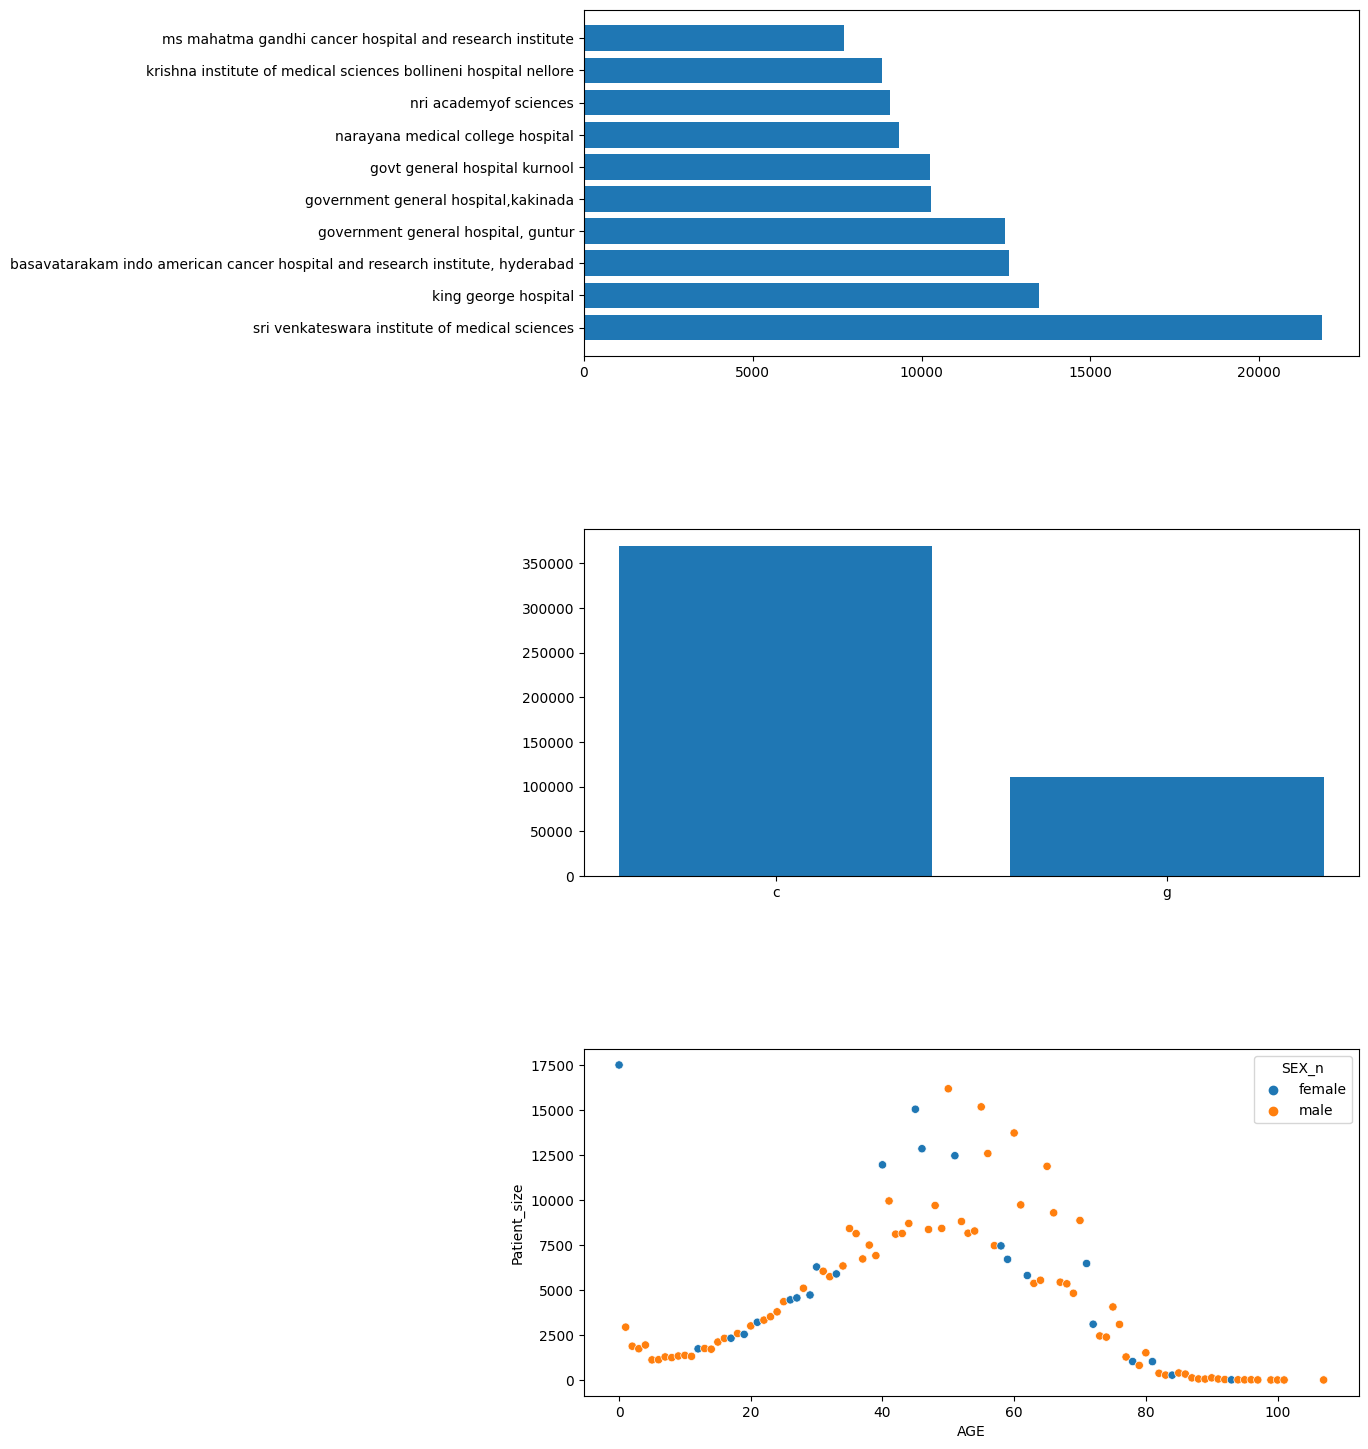

In [34]:
# Create the subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

total_hosp = clean_data.groupby(["HOSP_NAME"]).size().reset_index(name="counts")
topten = total_hosp.sort_values("counts", ascending=False).head(10)
total_type = clean_data.groupby(["HOSP_TYPE"]).size().reset_index(name="counts")
ages = clean_data.groupby(["AGE"]).size().reset_index(name="Patient_size")

clean_data["SEX_n"] = clean_data["SEX"].apply(lambda x: "male" if x == "male(child)" else ("female" if x == "female(child)" else x))

# First plot
ax[0].barh(y=topten["HOSP_NAME"], width=topten["counts"])

# Second plot
ax[1].bar(x=total_type["HOSP_TYPE"], height=total_type["counts"])

# Third plot (using seaborn)
sns.scatterplot(x=ages["AGE"], y=ages["Patient_size"], hue=clean_data["SEX_n"], ax=ax[2])

# Adjust the layout to separate the plots vertically
plt.subplots_adjust(hspace=0.5)

plt.show()


In [38]:
clean_data.SEX_n.value_counts()

SEX_n
male      285795
female    193893
Name: count, dtype: int64

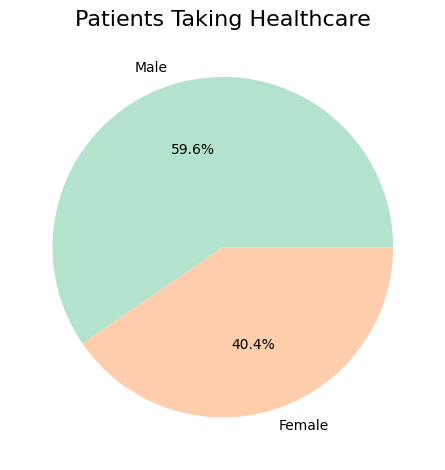

In [41]:
fig, x = plt.subplots()

_ = x.pie(x = clean_data.SEX_n.value_counts(), labels = ["Male","Female"], autopct='%1.1f%%',
           colors=plt.cm.Pastel2(range(80)))

x.set_title("Patients Taking Healthcare", size = 16)

plt.tight_layout()
plt.show()